# Aula 04 Crash Course Pandas

## Objetivo:

Objetivo desta aula é apresentar a análise de série temporal com pandas e o seaborn. Apresentação do Prophet como pacote para criar modelo de previsão futura da série.


## Roteiro da aula:

- Indexação por tempo

- Pediocidade e Sazonalidades: Frequencias Diarias, Semanais, Mensais e Anuais

- Metodologia de Rolling Window

- Tendências

- heatmap de tabelas pivot

- Montando modelo de Predição futura para seu conjunto de dados



## Referências

- [Extensões do Jupyter: artigo no Medium](https://medium.com/@seymatas/5-jupyter-notebook-extensions-for-a-fully-organized-data-science-project-d764195f91be)

- [Instalando extensões do jupyter e possíveis erros - slackoverflow](https://stackoverflow.com/questions/37718907/variable-explorer-in-jupyter-notebook)

- [Pandas](https://pandas.pydata.org/)

- [Introdução em 10 minutos do Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

- [Documentação Pandas: Guia do usuário](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

- [GitHub Cheat Sheet Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Here-Cheatsheet)

- [Numpy](https://numpy.org/)

- [Kaggle Titanic Data](https://www.kaggle.com/c/titanic/data)

- [Split-Apply-Combine Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

- [Colunas Categóricas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)

- [Selecionando colunas pelo tipo de variável](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

- [Merge, Join, Concatanate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

- [Pacote Seaborn](https://seaborn.pydata.org/)

- [Seaborn Tutoriais](https://seaborn.pydata.org/tutorial.html)

- [Overview das figuras de seaborn](https://seaborn.pydata.org/tutorial/function_overview.html)

- [Regra 68–95–99.7](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)

- [Dados do **Open Power System** da Alemanha](https://data.open-power-system-data.org/time_series/)

- [Análise temporal dos dados de Consumo de Energia entre 2006 e 2017 da Alemanha](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)

- [Análise de dados Climáticos de Londres](https://medium.com/@emafuma/simple-time-series-eda-using-pandas-and-seaborn-b3e2ef9636e6)

- [Mapa de cor (heatmap) para série temporal com Pandas](https://jonisalonen.com/2019/plotting-a-time-series-heat-map-with-pandas/)

- [Visualização de Séries Temporais com Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

- [Pacote fbprophet, ou Prophet](https://facebook.github.io/prophet/)

- [Caso plt.figure para figsize não funcione no seaborn, use aspect](https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot/51602446#51602446)

- [Timezone e Objetos Datetime](https://howchoo.com/g/ywi5m2vkodk/working-with-datetime-objects-and-timezones-in-python)

## Contato:

- E-mails:

    - walter@on.br
 
    - walter@neuralmed.ai
 
    - walterwsmf@outlook.com
 
- Redes Sociais:

    - [LinkedIn](https://www.linkedin.com/in/walterwsmf/)

    - [Twitter](https://twitter.com/walterwsmf)
    
### Agradecimento:

Agradecimentos a cientista [Jenifer](https://github.com/jenfly) que disponibilizou pre-processamento:

https://github.com/jenfly/opsd/blob/master/time-series-preprocessing.ipynb

In [1]:
%%time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(14, 6)})

CPU times: user 1.15 s, sys: 343 ms, total: 1.49 s
Wall time: 3.1 s


In [2]:
%%time
datafile = '/Users/walter/Downloads/time_series_60min_singleindex.csv' # arquivo tem 219 mb
data = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)
data.head()

CPU times: user 11.8 s, sys: 1.82 s, total: 13.6 s
Wall time: 33.9 s


,cet_cest_timestamp,AL_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_power_statistics,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BA_load_actual_entsoe_power_statistics,BE_load_actual_entsoe_power_statistics,...,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,TR_load_actual_entsoe_power_statistics,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency,UA_east_load_actual_entsoe_transparency,UA_east_load_forecast_entsoe_transparency,UA_west_load_actual_entsoe_power_statistics,UA_west_load_actual_entsoe_transparency,UA_west_load_forecast_entsoe_transparency
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2004-12-31 23:00:00+00:00,2005-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:00:00+00:00,2005-01-01T01:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00+00:00,2005-01-01T02:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 02:00:00+00:00,2005-01-01T03:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 03:00:00+00:00,2005-01-01T04:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.columnsumns

Index(['cet_cest_timestamp', 'AL_load_actual_entsoe_power_statistics',
       'AT_load_actual_entsoe_power_statistics',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BA_load_actual_entsoe_power_statistics',
       'BE_load_actual_entsoe_power_statistics',
       ...
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'TR_load_actual_entsoe_power_statistics',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency',
       'UA_east_load_actual_entsoe_transparency',
       'UA_east_load_forecast_entsoe_transparency',
       'UA_west_load_actual_entsoe_power_statistics',
       'UA_west_load_actual_entsoe_transparency',
       'UA_west_load_forecast_entsoe_transparency'],
      dtype='object', length=392)

In [4]:
for n in data.columns:
    print(n)

cet_cest_timestamp
AL_load_actual_entsoe_power_statistics
AT_load_actual_entsoe_power_statistics
AT_load_actual_entsoe_transparency
AT_load_forecast_entsoe_transparency
AT_price_day_ahead
AT_solar_generation_actual
AT_wind_onshore_generation_actual
BA_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_power_statistics
BE_load_actual_entsoe_transparency
BE_load_forecast_entsoe_transparency
BE_solar_generation_actual
BE_wind_offshore_generation_actual
BE_wind_onshore_capacity
BE_wind_onshore_generation_actual
BE_wind_onshore_profile
BG_load_actual_entsoe_power_statistics
BG_load_actual_entsoe_transparency
BG_load_forecast_entsoe_transparency
BG_solar_generation_actual
BG_wind_onshore_generation_actual
CH_load_actual_entsoe_power_statistics
CH_load_actual_entsoe_transparency
CH_load_forecast_entsoe_transparency
CH_solar_capacity
CH_solar_generation_actual
CH_wind_capacity
CH_wind_onshore_capacity
CH_wind_onshore_generation_actual
CS_load_actual_entsoe_power_statistics
CY_load_actua

In [5]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""
    
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]
    
    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    
    df_out = df_all[columns].rename(columns=columns_map)
    
    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]
        
    return df_out

In [6]:
# dados da Alemanha entre 2006 e 2020
df = extract_country(data,'DE',year_min=2006, year_max=2020) #alemanha ate 2019

In [7]:
df.head()

,load_actual_entsoe_power_statistics,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_capacity,solar_generation_actual,solar_profile,wind_capacity,wind_generation_actual,wind_profile,...,tennet_wind_generation_forecast,tennet_wind_offshore_generation_actual,tennet_wind_onshore_generation_actual,transnetbw_load_actual_entsoe_transparency,transnetbw_load_forecast_entsoe_transparency,transnetbw_solar_generation_actual,transnetbw_solar_generation_forecast,transnetbw_wind_generation_actual,transnetbw_wind_generation_forecast,transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2006-01-01 00:00:00+00:00,52552.7473,NaN,NaN,30.07,2036.0,NaN,NaN,15941.0,NaN,NaN,...,1813.0,NaN,1755.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 01:00:00+00:00,47740.6593,NaN,NaN,27.94,2036.0,NaN,NaN,15941.0,NaN,NaN,...,1726.0,NaN,1591.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 02:00:00+00:00,45529.6703,NaN,NaN,21.71,2036.0,NaN,NaN,15941.0,NaN,NaN,...,1627.0,NaN,1628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 03:00:00+00:00,44514.2857,NaN,NaN,8.24,2036.0,NaN,NaN,15941.0,NaN,NaN,...,1570.0,NaN,1452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-01 04:00:00+00:00,42708.7912,NaN,NaN,1.13,2036.0,NaN,NaN,15941.0,NaN,NaN,...,1509.0,NaN,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,load_actual_entsoe_power_statistics,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_capacity,solar_generation_actual,solar_profile,wind_capacity,wind_generation_actual,wind_profile,...,tennet_wind_generation_forecast,tennet_wind_offshore_generation_actual,tennet_wind_onshore_generation_actual,transnetbw_load_actual_entsoe_transparency,transnetbw_load_forecast_entsoe_transparency,transnetbw_solar_generation_actual,transnetbw_solar_generation_forecast,transnetbw_wind_generation_actual,transnetbw_wind_generation_forecast,transnetbw_wind_onshore_generation_actual
utc_timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-30 19:00:00+00:00,NaN,54612.0,53975.0,NaN,NaN,NaN,NaN,NaN,8194.0,NaN,...,3218.0,1207.0,3568.0,6927.0,7086.0,NaN,NaN,33.0,112.0,33.0
2019-04-30 20:00:00+00:00,NaN,51309.0,51542.0,NaN,NaN,NaN,NaN,NaN,8659.0,NaN,...,3152.0,1149.0,3414.0,6369.0,6574.0,NaN,NaN,51.0,108.0,51.0
2019-04-30 21:00:00+00:00,NaN,47886.0,47561.0,NaN,NaN,NaN,NaN,NaN,8414.0,NaN,...,3025.0,1227.0,3029.0,5800.0,5933.0,NaN,NaN,61.0,94.0,61.0
2019-04-30 22:00:00+00:00,NaN,44594.0,41060.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5395.0,4416.0,NaN,NaN,NaN,NaN,NaN
2019-04-30 23:00:00+00:00,NaN,42599.0,39328.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5147.0,4236.0,NaN,NaN,NaN,NaN,NaN


In [10]:
#Rename columns for convenience
cols_map = {'load_actual_entsoe_power_statistics' : 'Consumption',
            'wind_generation_actual' : 'Wind',
            'solar_generation_actual' : 'Solar'}

In [11]:
df_hrly = df[list(cols_map.keys())].rename(columns=cols_map)

# Compute wind + solar generation
df_hrly['Wind+Solar'] = df_hrly[['Wind', 'Solar']].sum(axis=1, skipna=False)

# Convert from MW to GW
df_hrly = df_hrly / 1000
df_hrly.head()

,Consumption,Wind,Solar,Wind+Solar
utc_timestamp,,,,
2006-01-01 00:00:00+00:00,52.552747,NaN,NaN,NaN
2006-01-01 01:00:00+00:00,47.740659,NaN,NaN,NaN
2006-01-01 02:00:00+00:00,45.529670,NaN,NaN,NaN
2006-01-01 03:00:00+00:00,44.514286,NaN,NaN,NaN
2006-01-01 04:00:00+00:00,42.708791,NaN,NaN,NaN


In [12]:
# Compute daily totals in GWh
df_daily = df_hrly.resample('D').sum(min_count=24)

df_daily = df_daily.rename_axis('Date')

df_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01 00:00:00+00:00,1174.927473,NaN,NaN,NaN
2006-01-02 00:00:00+00:00,1517.056044,NaN,NaN,NaN
2006-01-03 00:00:00+00:00,1585.201099,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,1601.337363,NaN,NaN,NaN
2006-01-05 00:00:00+00:00,1623.220879,NaN,NaN,NaN


In [13]:
df_daily.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2019-04-21 00:00:00+00:00', '2019-04-22 00:00:00+00:00',
               '2019-04-23 00:00:00+00:00', '2019-04-24 00:00:00+00:00',
               '2019-04-25 00:00:00+00:00', '2019-04-26 00:00:00+00:00',
               '2019-04-27 00:00:00+00:00', '2019-04-28 00:00:00+00:00',
               '2019-04-29 00:00:00+00:00', '2019-04-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4868, freq='D')

In [14]:
df_daily.to_csv('dataset_serie_energia_solar.csv')

In [15]:
del data, df, df_hrly, df_daily

### Função de conversao para datetime:

```python
pd.to_datetime
```

In [16]:
pd.to_datetime('2020-10-01 10:10am')

Timestamp('2020-10-01 10:10:00')

In [17]:
pd.to_datetime('10/1/2020')

Timestamp('2020-10-01 00:00:00')

In [18]:
pd.to_datetime('1/10/2020',dayfirst=True)

Timestamp('2020-10-01 00:00:00')

In [19]:
pd.to_datetime(['2020-10-01', '10/2/2020', 'Oct 3, 2020'])

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03'], dtype='datetime64[ns]', freq=None)

In [20]:
help(pd.to_datetime)

Help on function to_datetime in module pandas.core.tools.datetimes:

to_datetime(arg: Union[~DatetimeScalar, List, Tuple, ~ArrayLike, ForwardRef('Series')], errors: str = 'raise', dayfirst: bool = False, yearfirst: bool = False, utc: Union[bool, NoneType] = None, format: Union[str, NoneType] = None, exact: bool = True, unit: Union[str, NoneType] = None, infer_datetime_format: bool = False, origin='unix', cache: bool = True) -> Union[pandas.core.indexes.datetimes.DatetimeIndex, ForwardRef('Series'), ~DatetimeScalar, ForwardRef('NaTType')]
    Convert argument to datetime.
    
    Parameters
    ----------
    arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like
        The object to convert to a datetime.
    errors : {'ignore', 'raise', 'coerce'}, default 'raise'
        - If 'raise', then invalid parsing will raise an exception.
        - If 'coerce', then invalid parsing will be set as NaT.
        - If 'ignore', then invalid parsing will return the i

In [21]:
pd.to_datetime(['10/1/20', '10/2/20', '10/3/20'], format='%m/%d/%y') 

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03'], dtype='datetime64[ns]', freq=None)

### Voltando ao dataset de energia solar, vento e elétrica:

In [22]:
opsd_daily = pd.read_csv('dataset_serie_energia_solar.csv')
opsd_daily.shape

(4868, 5)

In [23]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01 00:00:00+00:00,1174.927473,NaN,NaN,NaN
1,2006-01-02 00:00:00+00:00,1517.056044,NaN,NaN,NaN
2,2006-01-03 00:00:00+00:00,1585.201099,NaN,NaN,NaN
3,2006-01-04 00:00:00+00:00,1601.337363,NaN,NaN,NaN
4,2006-01-05 00:00:00+00:00,1623.220879,NaN,NaN,NaN


In [24]:
opsd_daily.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4863,2019-04-26 00:00:00+00:00,NaN,271.995,108.077,380.072
4864,2019-04-27 00:00:00+00:00,NaN,264.578,126.031,390.609
4865,2019-04-28 00:00:00+00:00,NaN,111.827,133.506,245.333
4866,2019-04-29 00:00:00+00:00,NaN,272.057,101.921,373.978
4867,2019-04-30 00:00:00+00:00,NaN,NaN,NaN,NaN


In [25]:
opsd_daily.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [26]:
opsd_daily['Date']

0       2006-01-01 00:00:00+00:00
1       2006-01-02 00:00:00+00:00
2       2006-01-03 00:00:00+00:00
3       2006-01-04 00:00:00+00:00
4       2006-01-05 00:00:00+00:00
                  ...            
4863    2019-04-26 00:00:00+00:00
4864    2019-04-27 00:00:00+00:00
4865    2019-04-28 00:00:00+00:00
4866    2019-04-29 00:00:00+00:00
4867    2019-04-30 00:00:00+00:00
Name: Date, Length: 4868, dtype: object

In [27]:
pd.to_datetime(opsd_daily['Date'])

0      2006-01-01 00:00:00+00:00
1      2006-01-02 00:00:00+00:00
2      2006-01-03 00:00:00+00:00
3      2006-01-04 00:00:00+00:00
4      2006-01-05 00:00:00+00:00
                  ...           
4863   2019-04-26 00:00:00+00:00
4864   2019-04-27 00:00:00+00:00
4865   2019-04-28 00:00:00+00:00
4866   2019-04-29 00:00:00+00:00
4867   2019-04-30 00:00:00+00:00
Name: Date, Length: 4868, dtype: datetime64[ns, UTC]

## mas podemos importar ja dizendo que a coluna 0, eh data e incluir como indexação:

In [28]:
opsd_daily = pd.read_csv('dataset_serie_energia_solar.csv', index_col=0, parse_dates=True)

In [29]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01 00:00:00+00:00,1174.927473,NaN,NaN,NaN
2006-01-02 00:00:00+00:00,1517.056044,NaN,NaN,NaN
2006-01-03 00:00:00+00:00,1585.201099,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,1601.337363,NaN,NaN,NaN
2006-01-05 00:00:00+00:00,1623.220879,NaN,NaN,NaN


In [30]:
opsd_daily.index

DatetimeIndex(['2006-01-01 00:00:00+00:00', '2006-01-02 00:00:00+00:00',
               '2006-01-03 00:00:00+00:00', '2006-01-04 00:00:00+00:00',
               '2006-01-05 00:00:00+00:00', '2006-01-06 00:00:00+00:00',
               '2006-01-07 00:00:00+00:00', '2006-01-08 00:00:00+00:00',
               '2006-01-09 00:00:00+00:00', '2006-01-10 00:00:00+00:00',
               ...
               '2019-04-21 00:00:00+00:00', '2019-04-22 00:00:00+00:00',
               '2019-04-23 00:00:00+00:00', '2019-04-24 00:00:00+00:00',
               '2019-04-25 00:00:00+00:00', '2019-04-26 00:00:00+00:00',
               '2019-04-27 00:00:00+00:00', '2019-04-28 00:00:00+00:00',
               '2019-04-29 00:00:00+00:00', '2019-04-30 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=4868, freq=None)

### está fixado com Time Zone, que não necessariamente é a correta (default eh UTC)

In [31]:
opsd_daily.index = opsd_daily.reset_index()['Date'].dt.tz_convert(None)

In [32]:
opsd_daily.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-04-26', '2019-04-27', '2019-04-28',
               '2019-04-29', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=4868, freq=None)

In [33]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2011-03-07,1552.036264,92.244,NaN,NaN,2011,3,0
2018-11-02,1425.638490,317.436,55.987,373.423,2018,11,4
2016-07-28,1411.450663,48.287,143.428,191.715,2016,7,3
2017-12-30,1240.254051,721.247,7.467,728.714,2017,12,5
2010-07-13,1505.619780,34.162,NaN,NaN,2010,7,1


# indexação por tempo:

In [34]:
opsd_daily.loc['2017-08-10']

Consumption    1383.104418
Wind            100.274000
Solar            71.160000
Wind+Solar      171.434000
Year           2017.000000
Month             8.000000
Weekday           3.000000
Name: 2017-08-10 00:00:00, dtype: float64

In [37]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1639.883505,78.647,6.371,85.018,2014,1,0
2014-01-21,1675.057732,15.643,5.835,21.478,2014,1,1
2014-01-22,1675.417526,60.259,11.992,72.251,2014,1,2


In [36]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1661.391209,199.607,43.502,243.109,2012,2,2
2012-02-02,1718.029670,73.469,44.675,118.144,2012,2,3
2012-02-03,1718.275824,36.352,46.510,82.862,2012,2,4
2012-02-04,1508.367033,20.551,45.225,65.776,2012,2,5
2012-02-05,1405.969231,55.522,54.572,110.094,2012,2,6
2012-02-06,1730.512088,34.896,55.389,90.285,2012,2,0
2012-02-07,1774.810989,100.312,19.867,120.179,2012,2,1
2012-02-08,1773.378022,93.763,36.930,130.693,2012,2,2
2012-02-09,1748.936264,132.219,19.042,151.261,2012,2,3


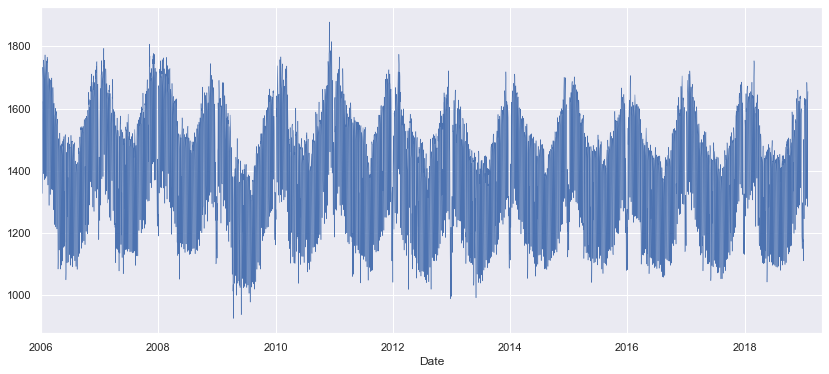

In [38]:
opsd_daily['Consumption'].plot(linewidth=0.5);

## Pergunta: Por que o comportamento sinoidal do consumo?

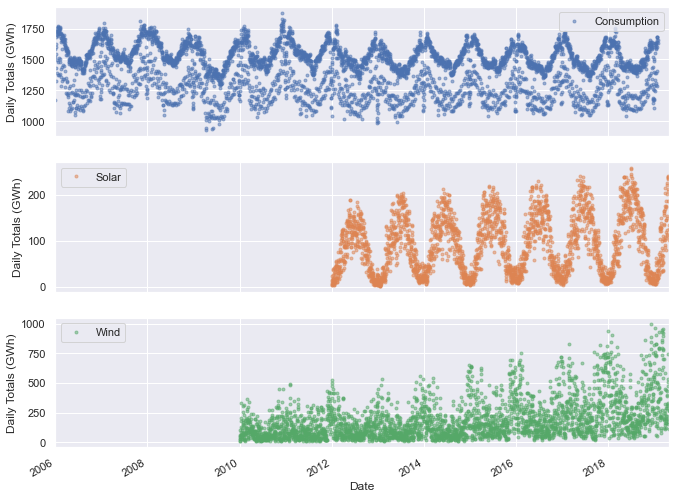

In [39]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

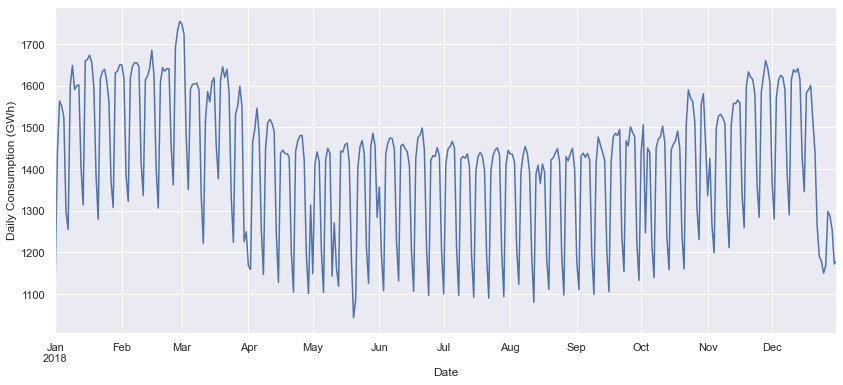

In [40]:
ax = opsd_daily.loc['2018', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

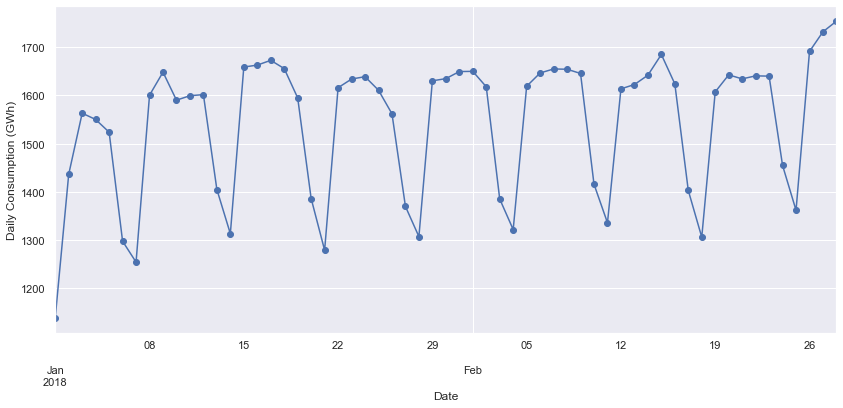

In [41]:
ax = opsd_daily.loc['2018-01':'2018-02', 'Consumption'].plot(marker='o', linestyle='-')

ax.set_ylabel('Daily Consumption (GWh)');

# Sazonalidade

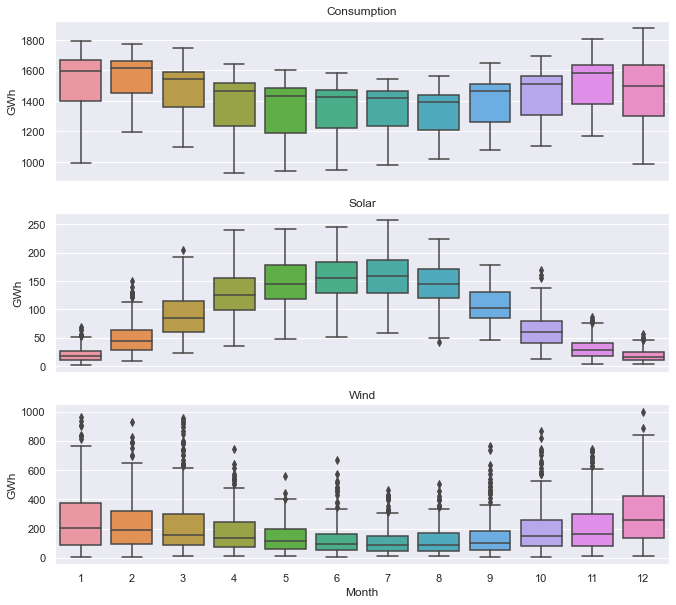

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')
plt.savefig('sazonalidade_mensal.pdf')

In [48]:
ls

2020-Anaconda-Updated-AE-Datasheet_June2020.pdf
Aula 01- Crash Course Pandas.ipynb
Aula 02 - Crash Course Pandas.ipynb
Aula 03 - Crash Course Pandas.ipynb
Aula 04 - Crash Course Pandas.ipynb
LICENSE
README.md
dataset_serie_energia_solar.csv
forecast_consumo_energia.pkl
sazonalidade_mensal.pdf


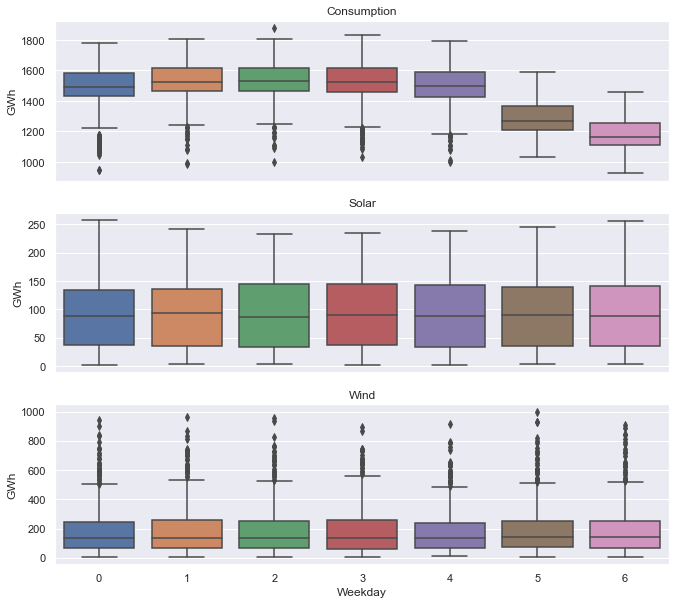

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily, x='Weekday', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

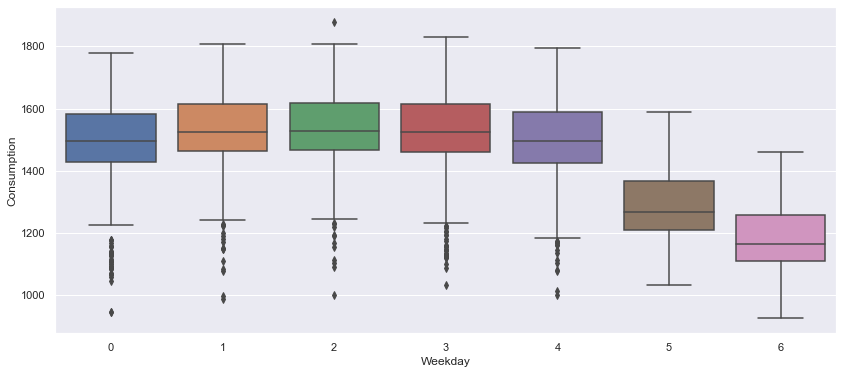

In [44]:
# de forma geral
sns.boxplot(data=opsd_daily, x='Weekday', y='Consumption');

## dentro de intervalo de tempo

In [49]:
pd.date_range('2018-03-10', '2018-03-15', freq='D')

DatetimeIndex(['2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15'],
              dtype='datetime64[ns]', freq='D')

In [50]:
pd.date_range('2018-09-20', periods=8, freq='H')

DatetimeIndex(['2018-09-20 00:00:00', '2018-09-20 01:00:00',
               '2018-09-20 02:00:00', '2018-09-20 03:00:00',
               '2018-09-20 04:00:00', '2018-09-20 05:00:00',
               '2018-09-20 06:00:00', '2018-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

# Vamos selecionar pequena amostra:

In [51]:
times_sample = pd.date_range('2018-03-10', '2018-04-15', freq='D')
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()
consum_sample.head()

,Consumption
2018-03-10,1338.714143
2018-03-11,1221.353255
2018-03-12,1517.882102
2018-03-13,1585.495653
2018-03-14,1560.665255


In [52]:
consum_sample.index

DatetimeIndex(['2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02',
               '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06',
               '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
               '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14',
               '2018-04-15'],
              dtype='datetime64[ns]', freq='D')

In [53]:
consum_freq = consum_sample.asfreq('D') # se nao esta em frequencia diaria, podemos forcar
# e completar buracos de tempo for metodo de completar NaNs

consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq.head()

,Consumption,Consumption - Forward Fill
2018-03-10,1338.714143,1338.714143
2018-03-11,1221.353255,1221.353255
2018-03-12,1517.882102,1517.882102
2018-03-13,1585.495653,1585.495653
2018-03-14,1560.665255,1560.665255


In [54]:
consum_freq.index

DatetimeIndex(['2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19', '2018-03-20', '2018-03-21',
               '2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31', '2018-04-01', '2018-04-02',
               '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06',
               '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
               '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14',
               '2018-04-15'],
              dtype='datetime64[ns]', freq='D')

Vamos alterar para frequencia semanal, usando media como metodo para combinar resutados semanais

In [55]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar'] 

opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean() 

opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1174.927473,NaN,NaN,NaN
2006-01-08,1517.912245,NaN,NaN,NaN
2006-01-15,1633.769545,NaN,NaN,NaN


In [56]:
opsd_weekly_mean.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2019-04-21,NaN,333.331857,228.335143,561.667
2019-04-28,NaN,394.984143,173.000857,567.985
2019-05-05,NaN,272.057000,101.921000,373.978


In [57]:
help(opsd_daily.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index', 1 or 'columns'}
        Axis along whi

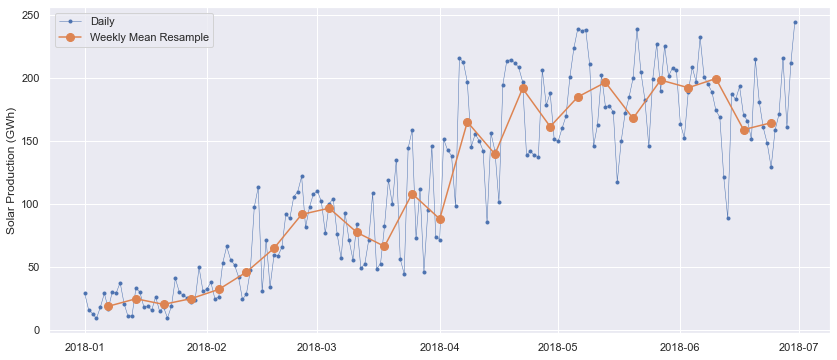

In [58]:
start, end = '2018-01', '2018-06'


fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-',
        label='Weekly Mean Resample')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [59]:
# por mes
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,49785.389011,NaN,NaN,NaN
2006-02-28,45141.750549,NaN,NaN,NaN
2006-03-31,48327.608792,NaN,NaN,NaN


In [61]:
# matplotlib possui suas funcoes para lidar com tempo
import matplotlib.dates as mdates

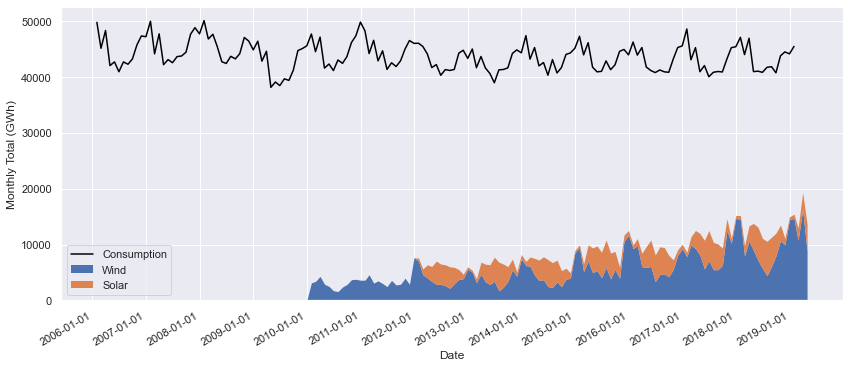

In [64]:
fig, ax = plt.subplots()

ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')

opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0,)

ax.xaxis.set_major_locator(mdates.YearLocator()) # especifica que eixo é temporal
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

In [65]:
# frequencia anual

opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)

opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'

# calculando a razao de vento+solar sobre consumo total
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2017,516543.561807,102667.365,35882.643,138550.008,0.268225
2018,517587.311541,108567.165,41233.943,149801.108,0.289422
2019,NaN,NaN,NaN,NaN,NaN


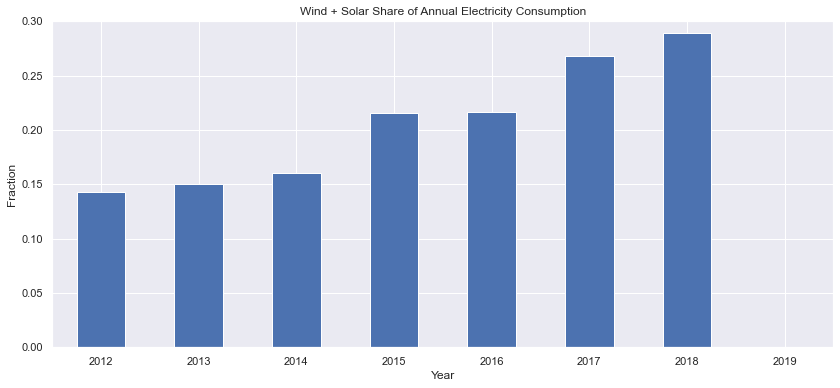

In [66]:

ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

# Rolling windows

Pandas proporciona criar janela temporal que vai caminhando ao longo do tempo da análise. Isto é muito bom, pois, por exemplo, a média móvel é baseado nesse contexto.

In [67]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean() #movimentando-se a cada 7 dias 
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1496.122449,NaN,NaN,NaN
2006-01-05,1517.912245,NaN,NaN,NaN
2006-01-06,1541.272056,NaN,NaN,NaN
2006-01-07,1562.367504,NaN,NaN,NaN
2006-01-08,1581.199372,NaN,NaN,NaN
2006-01-09,1593.153689,NaN,NaN,NaN


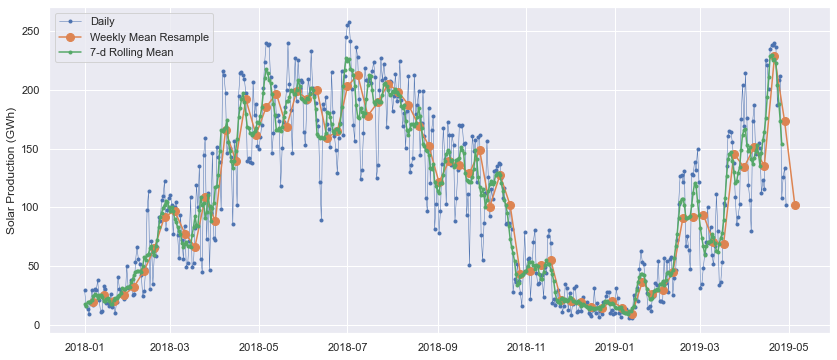

In [68]:
start, end = '2018-01', '2019-06'

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')

ax.set_ylabel('Solar Production (GWh)')
ax.legend();

# Pergunta: Por que a diferença entre a média móvel por 7 dias e a média de 7 dias?

# Tendências

In [69]:
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

(array([12784., 13149., 13514., 13879., 14245., 14610., 14975., 15340.,
        15706., 16071., 16436., 16801., 17167., 17532., 17897.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

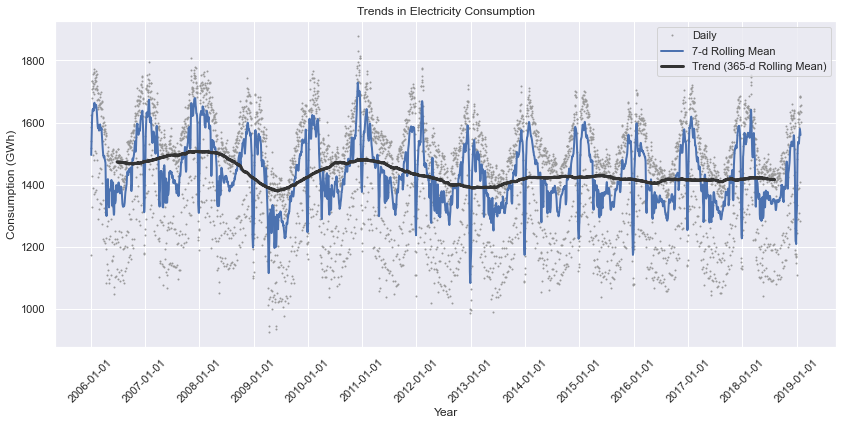

In [70]:
fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6',linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator(),)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption')
plt.xticks(rotation=45)

In [71]:
opsd_365d.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN


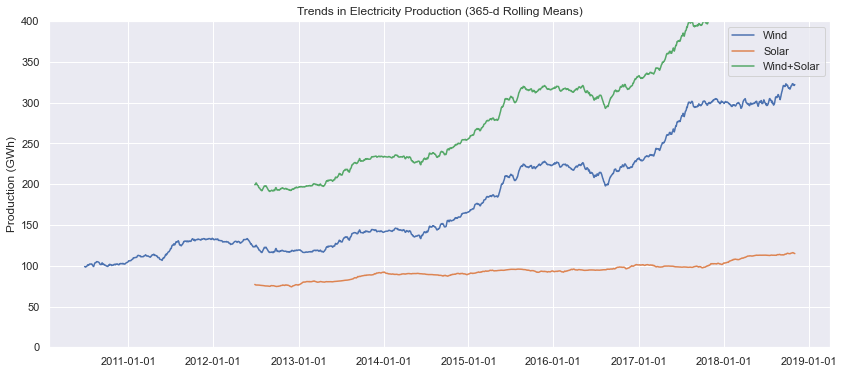

In [72]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)');

## Heatmap

In [73]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1174.927473,NaN,NaN,NaN,2006,1,6
2006-01-02,1517.056044,NaN,NaN,NaN,2006,1,0
2006-01-03,1585.201099,NaN,NaN,NaN,2006,1,1
2006-01-04,1601.337363,NaN,NaN,NaN,2006,1,2
2006-01-05,1623.220879,NaN,NaN,NaN,2006,1,3


In [74]:
opsd_daily.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday'],
      dtype='object')

In [75]:
opsd_pivot = pd.pivot_table(opsd_daily[:'2018'], values='Consumption',
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
opsd_pivot

Year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
Month,,,,,,,,,,,,,,
1,1605.980291,1612.151684,1615.795037,1496.984190,1538.507338,1556.363275,1485.100248,1451.862566,1529.135384,1525.208214,1492.039937,1567.309971,1519.055023,1538.114858
2,1612.205377,1576.356436,1613.721106,1529.840856,1590.464325,1578.255612,1567.765100,1488.008163,1542.747975,1569.937077,1514.290869,1538.307569,1571.594378,1561.072569
3,1558.955122,1539.461397,1536.981602,1438.705920,1520.731017,1502.186281,1422.800284,1408.430308,1460.266345,1488.233788,1460.328969,1459.796877,1514.032555,1485.454651
4,1401.163626,1406.739744,1514.553004,1271.435568,1386.269744,1429.376154,1389.480220,1387.208755,1399.569794,1391.864330,1392.697712,1364.683191,1365.318376,1392.335401
5,1377.459872,1390.589011,1378.235413,1261.154661,1365.077065,1441.327792,1361.965615,1310.025310,1373.701763,1319.909977,1327.414827,1356.190286,1323.897429,1352.842232
6,1364.595238,1418.493114,1414.062747,1281.820696,1371.360916,1378.345421,1343.204029,1298.900000,1344.033230,1366.956770,1359.626876,1334.889604,1360.973743,1356.712491
7,1377.248671,1407.839844,1409.743247,1279.687770,1388.425771,1372.272740,1332.916165,1331.322510,1390.526039,1383.091719,1330.780885,1317.412389,1346.000878,1359.020664
8,1363.943708,1411.598192,1394.860971,1270.455654,1369.046508,1350.774654,1327.984899,1333.726764,1313.578317,1332.438743,1320.000384,1321.936817,1349.707369,1343.080999
9,1440.846081,1481.162088,1472.104872,1374.270293,1454.948938,1429.348169,1378.129267,1387.608681,1389.322062,1405.905945,1361.326962,1363.216358,1358.284914,1407.421125


In [76]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same lengt

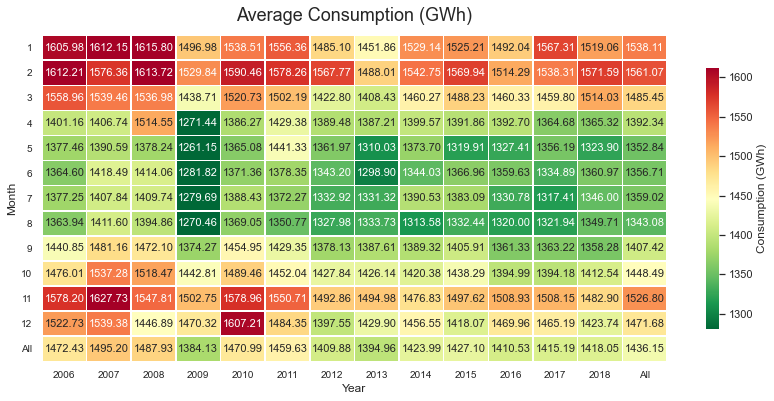

In [77]:
ax = sns.heatmap(opsd_pivot, cmap='RdYlGn_r',
                 robust=True,
                 fmt='.2f',
                 annot=True,
                 linewidths=.5,
                 annot_kws={'size':11},
                 cbar_kws={'shrink':.8,
                           'label':'Consumption (GWh)'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Average Consumption (GWh)', fontdict={'fontsize':18},    pad=14);

In [78]:
opsd_monthly

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,49785.389011,NaN,NaN,NaN
2006-02-28,45141.750549,NaN,NaN,NaN
2006-03-31,48327.608792,NaN,NaN,NaN
2006-04-30,42034.908792,NaN,NaN,NaN
2006-05-31,42701.256044,NaN,NaN,NaN
...,...,...,...,...
2018-12-31,44135.939756,14434.388,525.593,14959.981
2019-01-31,45468.036725,14695.580,744.253,15439.833
2019-02-28,NaN,10776.020,2191.284,12967.304


# Previsão de valores

Vamos tentar prever valores com pacote Prophet:

- https://facebook.github.io/prophet/

- https://anaconda.org/conda-forge/fbprophet


```bash
pip install fbprophet
```

Prophet funciona com compilador C++, e por isto, se usa windows, deve ter instalado o Microsoft Visual C++ e no Mac o Xcode (ou o command line tools do Xcode).


E de gráfico interativo o Plotly:

```bash
pip install plotly==4.10.0
```

- https://plotly.com/python/getting-started/

In [79]:
#!pip install fbprophet

In [80]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [83]:
# Agrupando dados
grup_rule = [pd.Grouper(freq='7D',level=0,label='left'),]

x_prophet = opsd_daily.groupby(by=grup_rule)["Consumption"].mean()

df_prophet = x_prophet.reset_index()
df_prophet.columns = ['ds','y'] #isso eh obrigatorio para Prophet
df_prophet.set_index("ds", inplace=True)

In [84]:
df_prophet = df_prophet.dropna()

In [86]:
df_prophet

,y
ds,
2006-01-01,1496.122449
2006-01-08,1624.744427
2006-01-15,1640.122763
2006-01-22,1663.286342
2006-01-29,1648.983516
...,...
2018-12-30,1311.635978
2019-01-06,1524.372927
2019-01-13,1532.656934


In [87]:
df_train = df_prophet[:'2015']
df_test = df_prophet['2016':]

In [88]:
# del x_prophet

In [89]:
# df_prophet.plot()
df_test.head()

,y
ds,
2016-01-03,1452.643865
2016-01-10,1529.360318
2016-01-17,1598.184144
2016-01-24,1519.140125
2016-01-31,1507.878168


In [90]:
model = Prophet(daily_seasonality=False)

In [91]:
model

In [92]:
model.fit(df_train.reset_index())

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [94]:
future = df_test.copy().reset_index()
future.tail()

,ds,y
156,2018-12-30,1311.635978
157,2019-01-06,1524.372927
158,2019-01-13,1532.656934
159,2019-01-20,1579.924421
160,2019-01-27,1544.630862


/Users/walter/opt/anaconda3/envs/CrashCourse/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ds'>

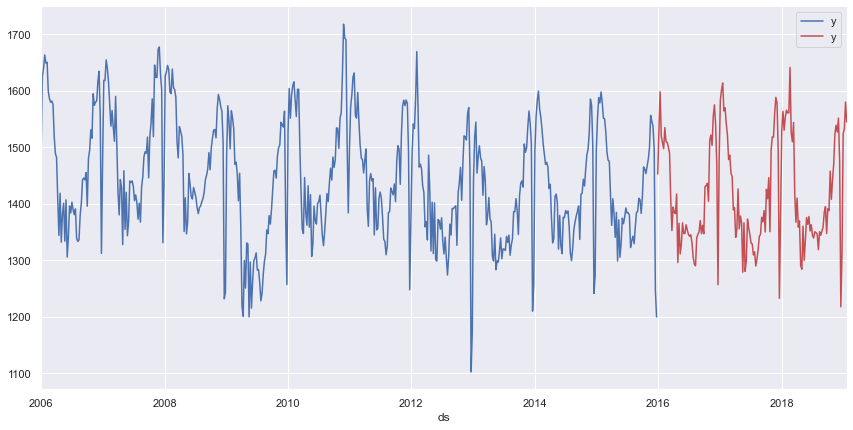

In [95]:
g = sns.FacetGrid(opsd_daily,size=6, aspect=2)
df_train.plot(color='b',ax=g.ax)
df_test.plot(color='r',ax=g.ax)

In [96]:
forecast = model.predict(future)

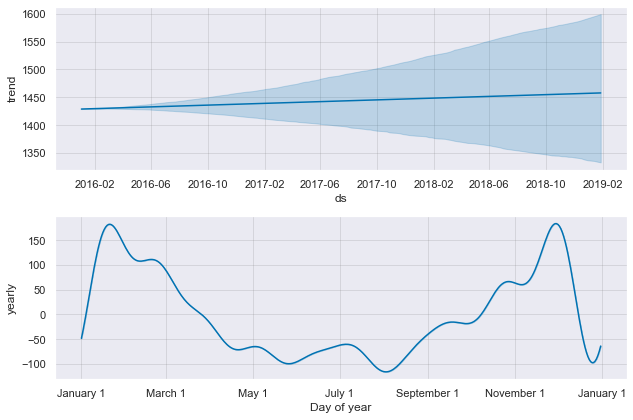

In [98]:
fig = model.plot_components(forecast)

In [99]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
156,2018-12-30,1380.039207,1248.259305,1526.481534
157,2019-01-06,1478.876487,1342.244056,1631.352997
158,2019-01-13,1588.109598,1449.792292,1735.913833
159,2019-01-20,1638.758721,1507.269788,1789.233805
160,2019-01-27,1623.100231,1491.294479,1776.920632


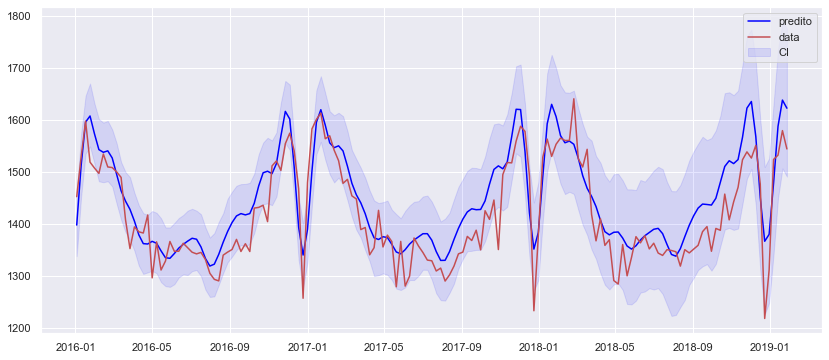

In [100]:
plt.figure(figsize=(14,6))
plt.plot(forecast['ds'],forecast['yhat'],color='blue',label='predito')

plt.fill_between(x=forecast['ds'],y1=forecast['yhat_lower'],y2=forecast['yhat_upper'],
                 color='blue',alpha=0.1,label='CI')

plt.plot(df_test.reset_index()['ds'],df_test['y'],color='r',label='data')

plt.legend()

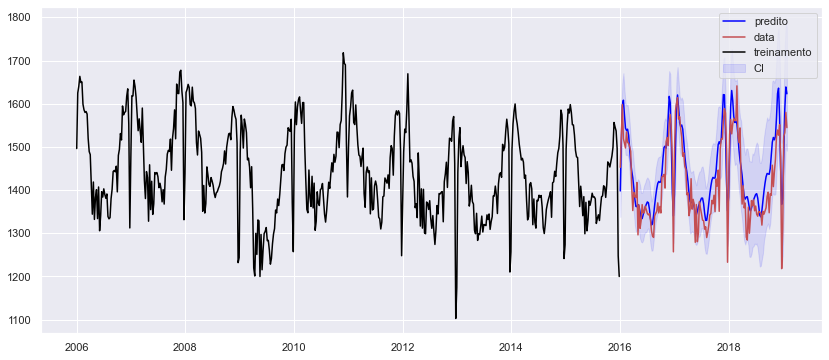

In [101]:
plt.figure(figsize=(14,6))
plt.plot(forecast['ds'],forecast['yhat'],color='blue',label='predito')
plt.fill_between(x=forecast['ds'],y1=forecast['yhat_lower'],y2=forecast['yhat_upper'],color='blue',alpha=0.1,label='CI')
plt.plot(df_test.reset_index()['ds'],df_test['y'],color='r',label='data')
plt.plot(df_train.reset_index()['ds'],df_train['y'],color='black',label='treinamento')
plt.legend()

In [102]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric

In [103]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 15 forecasts with cutoffs between 2008-02-02 00:00:00 and 2014-12-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2008-02-03,1630.960828,1583.937059,1680.279681,1597.605494,2008-02-02
1,2008-02-10,1605.616337,1560.356101,1650.312758,1594.943485,2008-02-02
2,2008-02-17,1600.126379,1551.390514,1646.708177,1638.309419,2008-02-02
3,2008-02-24,1598.214081,1552.074869,1647.677006,1605.866248,2008-02-02
4,2008-03-02,1588.638004,1542.560559,1633.617377,1601.721350,2008-02-02


In [104]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,36 days,2721.802097,52.170893,43.099784,0.029605,0.023389,0.653846
1,37 days,2868.758368,53.560791,44.070957,0.030178,0.023890,0.649573
2,38 days,2958.723756,54.394152,44.943645,0.030752,0.024599,0.641026
3,39 days,3033.712307,55.079146,45.817202,0.031339,0.028387,0.634615
4,40 days,2944.134047,54.259875,44.957050,0.030782,0.026423,0.647436


In [105]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
325,361 days,17580.480841,132.591406,106.993100,0.077618,0.065914,0.339744
326,362 days,17698.976121,133.037499,107.279137,0.077595,0.065914,0.339744
327,363 days,17955.021754,133.996350,108.043495,0.077933,0.065914,0.339744
328,364 days,18945.908175,137.644136,111.461390,0.080404,0.068865,0.326923
329,365 days,18809.834178,137.148949,111.982206,0.081037,0.072005,0.307692


In [106]:
df_p.describe()

,horizon,mse,rmse,mae,mape,mdape,coverage
count,330,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,200 days 12:00:00,8733.388303,90.377498,71.295180,0.050189,0.042008,0.487406
std,95 days 09:46:06.770119357,4352.713680,23.812066,18.270303,0.013309,0.009892,0.093373
min,36 days 00:00:00,2688.298804,51.848807,42.873743,0.029443,0.023389,0.307692
25%,118 days 06:00:00,4533.297461,67.329740,56.140012,0.039135,0.032334,0.423077
50%,200 days 12:00:00,9069.693735,95.234850,74.494313,0.051913,0.043235,0.467949
75%,282 days 18:00:00,11208.229940,105.868921,81.048853,0.057940,0.047821,0.570513
max,365 days 00:00:00,19050.180824,138.022392,111.982206,0.081037,0.072005,0.666667


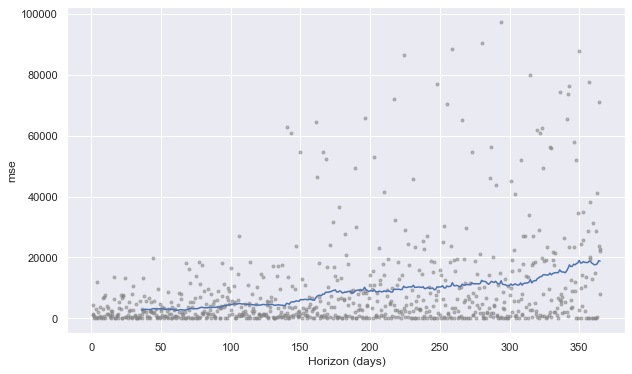

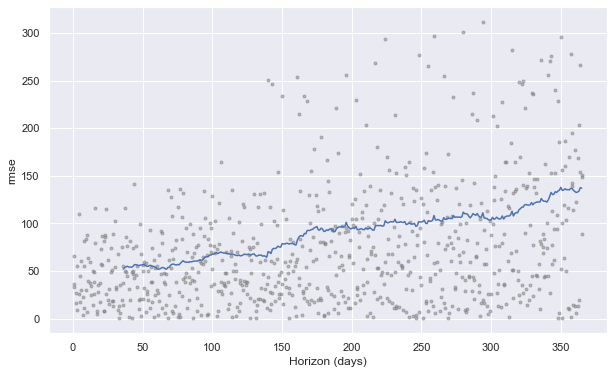

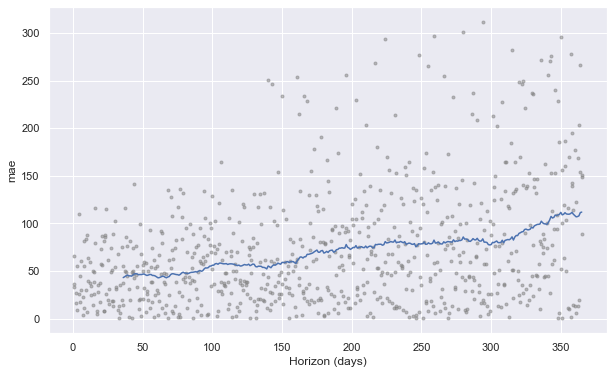

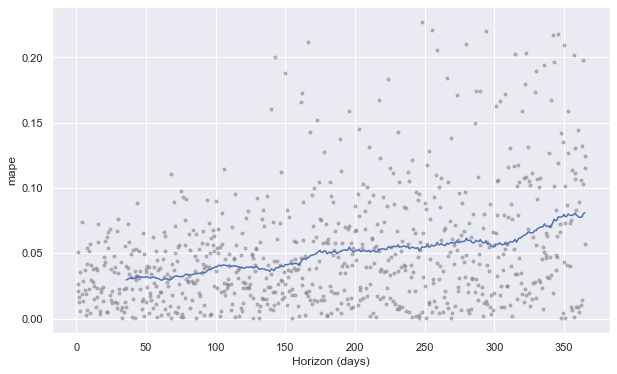

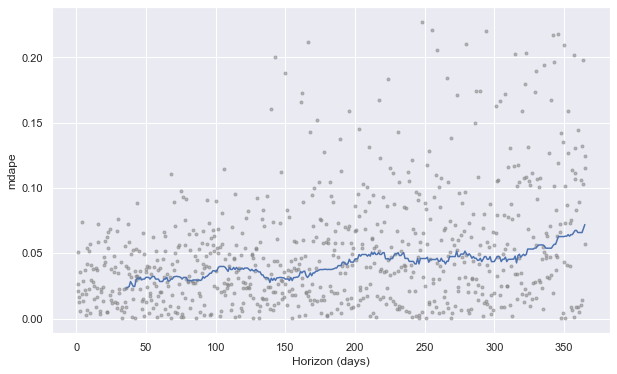

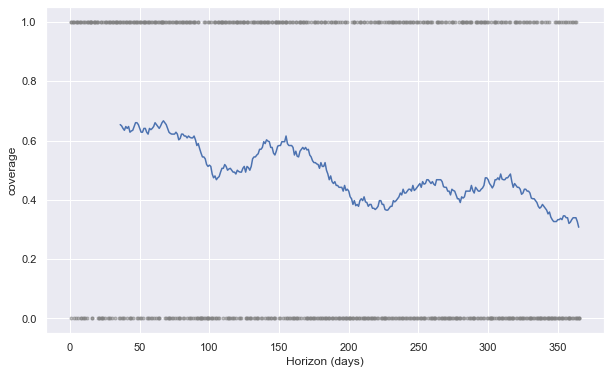

In [107]:
for metric in df_p.columns[1:]:
    fig = plot_cross_validation_metric(df_cv, metric=metric)

In [108]:
import pickle

In [109]:
with open("forecast_consumo_energia.pkl", "wb") as f:
     pickle.dump(model, f)

In [110]:
ls -hlas

total 19280
   0 drwxr-xr-x@ 16 walter  staff   512B Oct  1 11:29 ./
   0 drwxr-xr-x@  5 walter  staff   160B Sep 30 01:15 ../
  16 -rw-r--r--@  1 walter  staff   6.0K Sep 28 16:56 .DS_Store
   0 drwxr-xr-x@ 13 walter  staff   416B Sep 30 11:59 .git/
   8 -rw-r--r--@  1 walter  staff   1.8K Sep 29 11:46 .gitignore
   0 drwxr-xr-x@  6 walter  staff   192B Sep 30 23:34 .ipynb_checkpoints/
 440 -rw-r--r--@  1 walter  staff   217K Sep 27 18:31 2020-Anaconda-Updated-AE-Datasheet_June2020.pdf
1216 -rw-r--r--@  1 walter  staff   606K Sep 29 11:36 Aula 01- Crash Course Pandas.ipynb
 904 -rw-r--r--@  1 walter  staff   449K Sep 29 23:51 Aula 02 - Crash Course Pandas.ipynb
4896 -rw-r--r--@  1 walter  staff   2.4M Sep 30 23:37 Aula 03 - Crash Course Pandas.ipynb
4240 -rw-r--r--@  1 walter  staff   2.1M Oct  1 11:29 Aula 04 - Crash Course Pandas.ipynb
   8 -rw-r--r--@  1 walter  staff   1.1K Sep 28 12:02 LICENSE
   8 -rw-r--r--@  1 walter  staff   105B Sep 28 12:02 README.md
 648 -rw-r--r--@  1 wal

In [111]:
with open(r"forecast_consumo_energia.pkl", "rb") as input_file:
    load_model = pickle.load(input_file)

In [ ]:
#load_model.predict